In [321]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
Titanic = pd.read_csv("TitanicProcessed.csv")

DataFields = ["Age", "SibSp", "Parch", "Fare", "Female", 
             "Embarked_S", "Embarked_C", "Embarked_Q", 
             "Class_Lower", "Class_Middle", "Class_Upper", "Survived"]

Titanic[DataFields].head()

,Age,SibSp,Parch,Fare,Female,Embarked_S,Embarked_C,Embarked_Q,Class_Lower,Class_Middle,Class_Upper,Survived
0,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
2,26.0,0,0,7.9250,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,35.0,1,0,53.1000,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [9]:
Titanic.columns.values

array(['Unnamed: 0', 'Age', 'SibSp', 'Parch', 'Fare', 'Female',
       'Embarked_S', 'Embarked_C', 'Embarked_Q', 'Class_Lower',
       'Class_Middle', 'Class_Upper', 'Survived'], dtype=object)

In [10]:
len(Titanic)

891

In [15]:
Titanic["Survived"].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [16]:
len(Titanic["Survived"].value_counts())

2

In [17]:
Titanic["Survived"].nunique()

2

In [21]:
len(Titanic[Titanic.Survived == 1]) / len(Titanic)

0.3838383838383838

***
# NB frequentist development


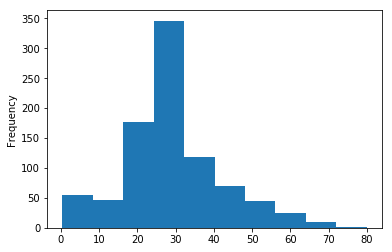

In [29]:
Titanic["Age"].plot.hist()
plt.show()

## Probabilidad de feature

In [205]:
# Obtener las categorías para f1
f1, bins_f1 = pd.qcut(Titanic["Age"], 5, retbins=True, duplicates='drop')

f1.value_counts()

(20.0, 28.0]     360
(0.419, 20.0]    179
(38.0, 80.0]     177
(28.0, 38.0]     175
Name: Age, dtype: int64

In [206]:
bins_f1

array([ 0.42, 20.  , 28.  , 38.  , 80.  ])

In [207]:
len(f1)

891

In [208]:
100 / len(f1)

0.1122334455667789

In [330]:
rango = pd.cut(np.array([16, 40]), bins = bins_f1)
rango

[(0.42, 20.0], (38.0, 80.0]]
Categories (4, interval[float64]): [(0.42, 20.0] < (20.0, 28.0] < (28.0, 38.0] < (38.0, 80.0]]

In [346]:
f1.value_counts()[rango] / len(f1)

(0.42, 20.0]    0.236842
(38.0, 80.0]    0.192982
Name: Age, dtype: float64

In [333]:
(f1.value_counts()[rango] / len(f1)).values

array([0.23684211, 0.19298246])

In [212]:
rango.isnull()[0]

False

In [334]:
# Probabilidad de una pdFeature = x
def probFeature(pdDataFrame, featureName, x, qsize):
    # Obtener las categorías de pdFeature y los bins 
    f, bins_f = pd.qcut(pdDataFrame[featureName], qsize, retbins=True, duplicates='drop')
    #print(f.value_counts())
    # Obtener el rango para el valor x
    rango = pd.cut(x, bins = bins_f)
    
    # Obtener la prob. de que x esté en un rango de f 
    if rango.isnull().any():
        return 0, bins_f
    
    return (f.value_counts()[rango] / len(f)).values, bins_f

In [335]:
p, binsAge = probFeature(Titanic, "Age", [16, 40], 5)
p, binsAge

(array([0.20089787, 0.1986532 ]), array([ 0.42, 20.  , 28.  , 38.  , 80.  ]))

## Probabilidad de feature dado el valor de una clase

In [229]:
# Obtener las categorías para f1
f1 = pd.cut(Titanic.loc[Titanic["Survived"] == 1. , "Age"], bins = bins_f1)
f1.value_counts()

(20.0, 28.0]    118
(0.42, 20.0]     81
(28.0, 38.0]     76
(38.0, 80.0]     66
Name: Age, dtype: int64

In [230]:
len(f1)

342

In [232]:
81 / len(f1)

0.23684210526315788

In [233]:
rango = pd.cut([16], bins = bins_f1)
rango

[(0.42, 20.0]]
Categories (4, interval[float64]): [(0.42, 20.0] < (20.0, 28.0] < (28.0, 38.0] < (38.0, 80.0]]

In [234]:
f1.value_counts()[rango] / len(f1)

(0.42, 20.0]    0.236842
Name: Age, dtype: float64

In [235]:
(f1.value_counts()[rango] / len(f1))[0]

0.23684210526315788

In [337]:
len(np.zeros(10))

10

In [492]:
# Probabilidad de una pdFeature = x, dado un valor de Class = label
def probFeatureDadoLabel(pdDataFrame, featureName, x, className, label, bins_f):
    # Obtener las categorías de pdFeature y los bins 
    f = pd.cut(pdDataFrame.loc[pdDataFrame[className] == label , featureName], 
               bins = bins_f, include_lowest=True)
    # Obtener el rango para el valor x
    rango = pd.cut(x, bins = bins_f, include_lowest=True)
    
    # Obtener la prob. de que x esté en un rango de f 
    if rango.isnull().any():
        return np.zeros(len(x))
    
    return (f.value_counts()[rango] / len(f)).values

In [351]:
probFeatureDadoLabel(Titanic, "Age", [16, 40], "Survived", 1, binsAge)

array([0.23684211, 0.19298246])

***
## Probabilidad de una clase

In [245]:
Titanic.loc[Titanic["Survived"] == 1, "Survived"].count()

342

In [246]:
Titanic.loc[Titanic["Survived"] == 1, "Survived"].count() / len(Titanic)

0.3838383838383838

In [247]:
# Para obtener la probabilidad de una clas sobre el dataframe entero
def probLabel(pdDataFrame, className, label):
    p = pdDataFrame.loc[pdDataFrame[className] == label, className].count() / len(pdDataFrame)
    return p

In [248]:
probLabel(Titanic, "Survived", 1)

0.3838383838383838

In [249]:
probLabel(Titanic, "Survived", 0)

0.6161616161616161

In [250]:
probLabel(Titanic, "Survived", 0) + probLabel(Titanic, "Survived", 1)

1.0

In [266]:
probLabel(Titanic, "Female", 1)

0.35241301907968575

***
## Probabilidad condicional

In [263]:
age = 16
survived = 1

pFeature, binsAge = probFeature(Titanic, "Age", age, 5)
pGiven = probFeatureDadoLabel(Titanic, "Age", age, "Survived", survived, binsAge)
pSurvived = probLabel(Titanic, "Survived", survived)

pGiven * pSurvived / pFeature

0.4525139664804469

*** 
## Probabilidad de un label de una clase, dado el label de otra

In [352]:
Titanic.loc[(Titanic["Female"] == 1) & (Titanic["Survived"] == 1), "Female"].count()

233

In [353]:
Titanic.loc[(Titanic["Survived"] == 1), "Female"].count()

342

In [354]:
Titanic.loc[(Titanic["Survived"] == 1) & (Titanic["Female"] == 1), "Female"].count() / Titanic.loc[(Titanic["Survived"] == 1), "Female"].count()

0.6812865497076024

In [296]:
# Probabilidad de una pdFeature = x, dado un valor de Class = label
def probLabelDadoLabel(pdDataFrame, featureName, x, className, label):
    # Probabilidad de la clase
    pClass = pdDataFrame.loc[(pdDataFrame[className] == label), featureName].count()
    # Probabilidad de la clase y del label
    pInt = pdDataFrame.loc[(pdDataFrame[className] == label)&(pdDataFrame[featureName] == x), featureName].count()
    
    return pInt / pClass

In [368]:
# Probabilidad de una pdFeature = x, dado un valor de Class = label
def probLabelDadoLabel(pdDataFrame, featureName, x, className, label):
    # Probabilidad de la clase
    pClass = pdDataFrame.loc[(pdDataFrame[className] == label), featureName].count()
    # Probabilidad de la clase y del label
    pInt = pdDataFrame.loc[(pdDataFrame[className] == label)&(pdDataFrame[featureName] == 1), featureName].count()
    
    pLabel = pInt/pClass
    pNotLabel = 1. - pLabel
    prob = np.array([pNotLabel, pLabel])
    
    return prob[x.astype(int)]

In [299]:
probLabelDadoLabel(Titanic, "Female", 1, "Survived", 1)

0.6812865497076024

In [366]:
a = np.array([0.3, 0.7])
b = np.array([0., 1., 1., 0]).astype(int)

In [367]:
a[b]

array([0.3, 0.7, 0.7, 0.3])

In [369]:
probLabelDadoLabel(Titanic, "Female", np.array([0., 1., 1., 0.]), "Survived", 1)

array([0.31871345, 0.68128655, 0.68128655, 0.31871345])

In [302]:
probLabelDadoLabel(Titanic, "Female", 1, "Survived", 1) + probLabelDadoLabel(Titanic, "Female", 0, "Survived", 1)

1.0

***
# Modelo de Naïve Bayes para datos del Titanic
"Age", "Fare", "Female", "Embarked_S", "Embarked_C", "Embarked_Q", "Class_Lower", "Class_Middle", "Class_Upper", "Survived"

In [404]:
Titanic.Age.head().values

array([22., 38., 26., 35., 35.])

In [406]:
survived = 1
age = Titanic.Age.head().values
fare = Titanic.Fare.head().values
female = Titanic.Female.head().values

_, binsAge = probFeature(Titanic, "Age", age, 5)
_, binsFare = probFeature(Titanic, "Fare", fare, 5)

pAgeGivenS = probFeatureDadoLabel(Titanic, "Age", age, "Survived", 1, binsAge)
pAgeGivenS

array([0.34502924, 0.22222222, 0.34502924, 0.22222222, 0.22222222])

In [407]:
survived_list = [0,1]
p_survived = []
for survived in survived_list:
    pAgeGivenS = probFeatureDadoLabel(Titanic, "Age", age, "Survived", survived, binsAge)
    pFareGivenS = probFeatureDadoLabel(Titanic, "Fare", fare, "Survived", survived, binsFare)
    pFemaleGivenS = probLabelDadoLabel(Titanic, "Female", female, "Survived", survived)
    pSurvived = probLabel(Titanic, "Survived", survived)
    p_survived.append( (pAgeGivenS * pFareGivenS * pFemaleGivenS) * pSurvived )

p_survived = np.array(p_survived)
#p_survived = p_survived / np.sum(p_survived)
p_survived

array([[0.05313851, 0.00188121, 0.01072989, 0.00188121, 0.02536156],
       [0.00468988, 0.01920074, 0.00976135, 0.01920074, 0.00294111]])

In [408]:
np.sum(p_survived, axis=0)

array([0.05782839, 0.02108196, 0.02049124, 0.02108196, 0.02830268])

In [411]:
# Comparar valores
p_survived[1,:] / np.sum(p_survived, axis=0), Titanic.Survived.head().values

(array([0.08110004, 0.9107666 , 0.47636686, 0.9107666 , 0.10391647]),
 array([0., 1., 1., 1., 0.]))

***
# Prueba con función para todas las features

In [493]:
age = Titanic.Age.head().values
fare = Titanic.Fare.head().values

# Rangos para age y fare
_, binsAge = probFeature(Titanic, "Age", age, 5)
_, binsFare = probFeature(Titanic, "Fare", fare, 5)

BinaryFields = ["Female", "Embarked_S", "Embarked_C", "Embarked_Q", 
             "Class_Lower", "Class_Middle", "Class_Upper", "Survived"]

survived_list = [0,1]
p_survived = []
for survived in survived_list:
    pAgeGivenS = probFeatureDadoLabel(Titanic, "Age", age, "Survived", survived, binsAge)
    pFareGivenS = probFeatureDadoLabel(Titanic, "Fare", fare, "Survived", survived, binsFare)
    
    pbinaryFeature = np.ones(len(Titanic.head().values))
    for binaryFeature in BinaryFields:
        pbinaryFeature = probLabelDadoLabel(Titanic, binaryFeature, Titanic[binaryFeature].head().values, "Survived", survived)
    
    pSurvived = probLabel(Titanic, "Survived", survived)
    p_survived.append( (pAgeGivenS * pFareGivenS * pbinaryFeature) * pSurvived )
    
p_survived = np.array(p_survived)
p_survived[1,:] / np.sum(p_survived, axis=0), Titanic.Survived.head().values

(array([0., 1., 1., 1., 0.]), array([0., 1., 1., 1., 0.]))

In [494]:
age = Titanic.Age.values
fare = Titanic.Fare.values

# Rangos para age y fare
_, binsAge = probFeature(Titanic, "Age", age, 5)
_, binsFare = probFeature(Titanic, "Fare", fare, 5)

BinaryFields = ["Female", "Embarked_S", "Embarked_C", "Embarked_Q", 
             "Class_Lower", "Class_Middle", "Class_Upper", "Survived"]

#BinaryFields = ["Female"]

survived_list = [0,1]
p_survived = []
for survived in survived_list:
    pAgeGivenS = probFeatureDadoLabel(Titanic, "Age", age, "Survived", survived, binsAge)
    pFareGivenS = probFeatureDadoLabel(Titanic, "Fare", fare, "Survived", survived, binsFare)
    
    pbinaryFeature = np.ones(len(Titanic.values))
    for binaryFeature in BinaryFields:
        pbinaryFeature = probLabelDadoLabel(Titanic, binaryFeature, Titanic[binaryFeature].values, "Survived", survived)
    
    pSurvived = probLabel(Titanic, "Survived", survived)
    p_survived.append( (pAgeGivenS * pFareGivenS * pbinaryFeature) * pSurvived )
    
p_survived = np.array(p_survived)
p_survived
#p_survived[1,:] / np.sum(p_survived, axis=0), Titanic.Survived.values
# Arreglo como columnas
#np.column_stack((p_survived[1,:] / np.sum(p_survived, axis=0), Titanic.Survived.values))

array([[0.06926173, 0.        , 0.        , ..., 0.04947267, 0.        ,
        0.02833435],
       [0.        , 0.02818307, 0.01432781, ..., 0.        , 0.03097906,
        0.        ]])

In [499]:
# Función para predecir utilizando Naïve Bayes con dataset Titanic
def predecirNBTitanic(Titanic):
    age = Titanic.Age.values
    fare = Titanic.Fare.values

    # Rangos para age y fare
    _, binsAge = probFeature(Titanic, "Age", age, 5)
    _, binsFare = probFeature(Titanic, "Fare", fare, 5)

    BinaryFields = ["Female", "Embarked_S", "Embarked_C", "Embarked_Q", 
                 "Class_Lower", "Class_Middle", "Class_Upper", "Survived"]

    survived_list = [0,1]
    p_survived = []
    for survived in survived_list:
        pAgeGivenS = probFeatureDadoLabel(Titanic, "Age", age, "Survived", survived, binsAge)
        pFareGivenS = probFeatureDadoLabel(Titanic, "Fare", fare, "Survived", survived, binsFare)

        pbinaryFeature = np.ones(len(Titanic.values))
        for binaryFeature in BinaryFields:
            pbinaryFeature = probLabelDadoLabel(Titanic, binaryFeature, Titanic[binaryFeature].values, "Survived", survived)

        pSurvived = probLabel(Titanic, "Survived", survived)
        p_survived.append( (pAgeGivenS * pFareGivenS * pbinaryFeature) * pSurvived )

    p_survived = np.array(p_survived)
    p_survived_yes = p_survived[1,:] / np.sum(p_survived, axis=0)
    return p_survived_yes

In [500]:
predecirNBTitanic(Titanic)

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 1., 0.